In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import pandas as pd


In [3]:
transacciones = pd.read_csv("/Users/carlosoliver/Desktop/EDA_xnova_internacional/Entrega_EDA_Carlos_Oliver/US_SAMPLE.csv", sep= ",")

In [4]:
transacciones.columns

Index(['complete_date', 'bill_of_lading', 'country', 'country_sure_level',
       'weight', 'shipper_name', 'shipper_address', 'consignee_name',
       'consignee_address', 'product_desc', 'hs_code', 'hs_code_sure_level',
       'estimate_arrival_date', 'carrier_sasc_code', 'vessel_country_code',
       'vessel_code', 'vessel_name', 'voyage', 'inbond_type', 'loading_port',
       'unloading_port', 'place_of_receipt', 'quantity', 'quantity_unit',
       'container_id', 'container_type', 'notify_party_name', 'marks_numbers',
       'true_supplier', 'true_buyer', 'manifest_n', 'day', 'states', 'year',
       'month'],
      dtype='object')

In [5]:
print(transacciones['estimate_arrival_date'].unique())
print(transacciones['estimate_arrival_date'].dtypes)


[20190224 20191103 20191213 ... 20240324 20181224 20240403]
int64


In [6]:
transacciones.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129165 entries, 0 to 1129164
Data columns (total 35 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   complete_date          1129165 non-null  object 
 1   bill_of_lading         1129165 non-null  object 
 2   country                1128968 non-null  object 
 3   country_sure_level     1129165 non-null  int64  
 4   weight                 1129039 non-null  float64
 5   shipper_name           1129165 non-null  object 
 6   shipper_address        1129163 non-null  object 
 7   consignee_name         1129165 non-null  object 
 8   consignee_address      1129165 non-null  object 
 9   product_desc           1129154 non-null  object 
 10  hs_code                1129165 non-null  int64  
 11  hs_code_sure_level     1129165 non-null  int64  
 12  estimate_arrival_date  1129165 non-null  int64  
 13  carrier_sasc_code      1129165 non-null  object 
 14  vessel_country_cod

In [7]:
transacciones["estimate_arrival_date"]
transacciones["complete_date"]

0          2019-03-02
1          2019-10-30
2          2019-12-14
3          2019-11-22
4          2019-12-16
              ...    
1129160    2023-07-29
1129161    2023-07-19
1129162    2023-07-29
1129163    2023-07-20
1129164    2023-07-28
Name: complete_date, Length: 1129165, dtype: object

In [8]:
#convertir en formato fecha desde un int
transacciones["estimate_arrival_date"] = pd.to_datetime(transacciones["estimate_arrival_date"].astype(str), format='%Y%m%d')
transacciones["complete_date"] = pd.to_datetime(transacciones["complete_date"])
transacciones['delay_time'] = transacciones['complete_date'] - transacciones['estimate_arrival_date']


In [9]:
# convertir en formato fecha
transacciones["complete_date"] = pd.to_datetime(transacciones["complete_date"])


In [10]:
# Calculo de retrasos
transacciones['delay_time'] = transacciones['complete_date'] - transacciones['estimate_arrival_date']

In [11]:
from datetime import timedelta

# Define el rango razonable para el tiempo de retraso (en días)
min_delay = timedelta(days=1)  # El mínimo tiempo de retraso razonable (1 día hacia delante)
max_delay = timedelta(days=30)  # El máximo tiempo de retraso razonable (ajusta según sea necesario)

# Filtra los datos para eliminar valores atípicos
df = transacciones[(transacciones['delay_time'] >= min_delay) & (transacciones['delay_time'] <= max_delay)]

# Ahora 'transacciones_filtradas' contiene solo las filas que están dentro del rango de tiempo de retraso razonable (1 día hacia delante)


### Vemos la calidad del dato

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802270 entries, 0 to 1129164
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   complete_date          802270 non-null  datetime64[ns] 
 1   bill_of_lading         802270 non-null  object         
 2   country                802184 non-null  object         
 3   country_sure_level     802270 non-null  int64          
 4   weight                 802178 non-null  float64        
 5   shipper_name           802270 non-null  object         
 6   shipper_address        802268 non-null  object         
 7   consignee_name         802270 non-null  object         
 8   consignee_address      802270 non-null  object         
 9   product_desc           802261 non-null  object         
 10  hs_code                802270 non-null  int64          
 11  hs_code_sure_level     802270 non-null  int64          
 12  estimate_arrival_date  802270 non-

In [13]:
df.describe(include='all')

,complete_date,bill_of_lading,country,country_sure_level,weight,shipper_name,shipper_address,consignee_name,consignee_address,product_desc,...,notify_party_name,marks_numbers,true_supplier,true_buyer,manifest_n,day,states,year,month,delay_time
count,802270,802270,802184,802270.000000,8.021780e+05,802270,802268,802270,802270,802261,...,802270,802270,802270,802270,802270.000000,802270.000000,802270,802270.000000,802270.000000,802270
unique,NaN,802270,211,NaN,NaN,190687,314164,172838,299932,546535,...,105838,314739,3,3,NaN,NaN,57,NaN,NaN,NaN
top,NaN,GNSI2803245101,CN,NaN,NaN,0,0,0,0,COLLECTIBLE TOY,...,0,NO MARKS<br/>,Y,Y,NaN,NaN,0,NaN,NaN,NaN
freq,NaN,1,355416,NaN,NaN,264400,264475,239013,239072,2808,...,307228,226038,490481,502803,NaN,NaN,427714,NaN,NaN,NaN
mean,2022-02-11 22:20:33.083126272,NaN,NaN,8.225156,4.306127e+04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100082.636275,15.755802,NaN,2021.631547,6.339604,6 days 22:12:14.350281077
min,2018-03-03 00:00:00,NaN,NaN,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,2018.000000,1.000000,1 days 00:00:00
25%,2021-03-16 00:00:00,NaN,NaN,8.000000,2.508000e+03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,8.000000,NaN,2021.000000,3.000000,2 days 00:00:00
50%,2022-01-20 00:00:00,NaN,NaN,9.000000,8.920000e+03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,2022.000000,6.000000,5 days 00:00:00
75%,2023-01-17 00:00:00,NaN,NaN,9.000000,1.905175e+04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,23.000000,NaN,2023.000000,10.000000,11 days 00:00:00
max,2024-02-28 00:00:00,NaN,NaN,9.000000,9.820000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,999982.000000,31.000000,NaN,2024.000000,12.000000,30 days 00:00:00


In [14]:
df_clean = df.drop(['bill_of_lading', 'country_sure_level', 'marks_numbers', 'true_supplier', 'true_buyer', 'manifest_n', 'day', 'states', 
                    'year', 'hs_code_sure_level', 'hs_code','container_id', 'quantity_unit','notify_party_name','voyage','vessel_country_code','vessel_code'], axis = 1)
pd.options.display.max_columns=None
df_clean.head()

,complete_date,country,weight,shipper_name,shipper_address,consignee_name,consignee_address,product_desc,estimate_arrival_date,carrier_sasc_code,vessel_name,inbond_type,loading_port,unloading_port,place_of_receipt,quantity,container_type,month,delay_time
0,2019-03-02,IT,18760.0,GRANITIFIANDRE,VIA RADICI NORD 112,STONEPEAK CERAMICS,314 W SUPERIOR ST SUITE 201,CERAMIC TILES,2019-02-24,"GNSI, GOUGH & SONS INC",MSC AZOV,0.0,"47537, LIVORNO","1703, SAVANNAH, GA",CASTELLARANO,600,2210,3,6 days
2,2019-12-14,TW,80.0,FREERIDER,NO22 BENGONG 5TH RD GANGSHAN TOWNSHIP,SCOOTERBUG,200 WEST SAND LAKE ROAD SUITE 800,SPARE PARTS FOR MOBILITY SCOOTER,2019-12-13,OPLT,CMA CGM TANCREDI,0.0,"58309, KAO HSIUNG","5201, MIAMI, FL",KAOHSIUNG TAIWAN,3,42G0,12,1 days
4,2019-12-16,CN,3421.0,JIASHAN FOAMTECH FURNITURE,NO 8 WANZHENG ROAD JIAXING 314000 CN,THE BRICK WAREHOUSE,7555 BEEDIE WAY DELTA BC V4G0A5 CA,SOFA PO 2IZZ09199K THIS SHIPMENT CONTAINS N O ...,2019-12-15,"SHKK, SCHOOKS TRUCKING",APL PARIS,0.0,"57035, SHANGHAI","3001, SEATTLE, WA",SHANGHAI,61,45G1,12,1 days
6,2019-10-24,DE,128.0,RIBE VERB TECHNIK GMBHANDCO KG,INDUSTRIESTR 5 WERK II SCHWABACH DE,ZF CHASSIS SYSTEMS DUNCAN,191 PARKWAY WEST DUNCAN SC 29334 US,AUTOMOTIVE AXLE PARTS SCREWS RIVETS HS-CODE 73181,2019-10-23,"BANQ, KUEHNE & NAGEL INC.",MSC LAURA,0.0,"42870, BREMERHAVEN","1601, CHARLESTON, SC",BREMEN,14,4510,10,1 days
7,2019-12-01,TW,101.0,POLISON,282 HEPING 2ND ROAD QIANZHEN DIST,LATITUDE 1 MARITIME,C O L1M SUPPLY INC 1648 NW 34TH TERRACE,INDUSTRIAL SAFETY EQUIPMENT .,2019-11-29,OPLT,APL FLORIDA,0.0,"58309, KAO HSIUNG","5201, MIAMI, FL",KAOHSIUNG TAIWAN,6,0,12,2 days


In [16]:
df_clean.iloc[:1,:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   complete_date          1 non-null      datetime64[ns] 
 1   country                1 non-null      object         
 2   weight                 1 non-null      float64        
 3   shipper_name           1 non-null      object         
 4   shipper_address        1 non-null      object         
 5   consignee_name         1 non-null      object         
 6   consignee_address      1 non-null      object         
 7   product_desc           1 non-null      object         
 8   estimate_arrival_date  1 non-null      datetime64[ns] 
 9   carrier_sasc_code      1 non-null      object         
 10  vessel_name            1 non-null      object         
 11  inbond_type            1 non-null      float64        
 12  loading_port           1 non-null      object         
 13 

In [17]:
df_clean.iloc[:1,:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   complete_date          1 non-null      datetime64[ns] 
 1   country                1 non-null      object         
 2   weight                 1 non-null      float64        
 3   shipper_name           1 non-null      object         
 4   shipper_address        1 non-null      object         
 5   consignee_name         1 non-null      object         
 6   consignee_address      1 non-null      object         
 7   product_desc           1 non-null      object         
 8   estimate_arrival_date  1 non-null      datetime64[ns] 
 9   carrier_sasc_code      1 non-null      object         
 10  vessel_name            1 non-null      object         
 11  inbond_type            1 non-null      float64        
 12  loading_port           1 non-null      object         
 13 

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
categorias_col = df_clean.select_dtypes(include=['object']).columns

In [34]:
# Creamos un DataFrame para almacenar los encoders
encoders_df = pd.DataFrame(index=df_clean.index, columns=categorias_col)

# Aplicamos LabelEncoder a cada columna categórica
for col in categorias_col:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    encoders_df[col] = le



In [36]:
df_clean

,complete_date,country,weight,shipper_name,shipper_address,consignee_name,consignee_address,product_desc,estimate_arrival_date,carrier_sasc_code,vessel_name,inbond_type,loading_port,unloading_port,place_of_receipt,quantity,container_type,month,delay_time
0,2019-03-02,93,1.910387e-04,56289,302254,145845,130005,143050,2019-02-24,949,4280,0.0,414,31,3125,1.661219e-06,367,0.181818,6 days
2,2019-12-14,193,8.146640e-07,49467,223877,135542,83907,460781,2019-12-13,1757,1451,0.0,639,123,8376,5.546640e-09,2290,1.000000,1 days
4,2019-12-16,37,3.483707e-05,79614,218245,151711,211954,456603,2019-12-15,2180,347,0.0,595,75,15879,1.663992e-07,5219,1.000000,1 days
6,2019-10-24,44,1.303462e-06,129216,143653,171877,76979,99973,2019-10-23,237,4477,0.0,343,29,2244,3.605316e-08,3993,0.818182,1 days
7,2019-12-01,193,1.028513e-06,119689,39241,89571,251055,275120,2019-11-29,1757,331,0.0,639,123,8376,1.386660e-08,0,1.000000,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129159,2023-07-17,11,1.306517e-04,0,2003,49760,21537,166996,2023-07-13,2647,4888,0.0,451,115,17683,2.390602e-06,3274,0.545455,4 days
1129160,2023-07-29,37,1.126477e-04,145862,58587,48811,156919,190956,2023-07-26,2696,5100,0.0,591,54,11934,1.181434e-06,5219,0.545455,3 days
1129161,2023-07-19,151,6.822811e-06,132111,269525,103159,217712,420605,2023-07-06,2782,3775,0.0,502,61,11315,1.028902e-06,367,0.545455,13 days
1129163,2023-07-20,205,9.867617e-06,0,2003,1,1502,480749,2023-07-17,2951,7087,0.0,535,76,7609,1.056635e-06,4766,0.545455,3 days


In [37]:
from sklearn.preprocessing import MinMaxScaler


# Identificar las columnas numéricas
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el MinMaxScaler a las columnas numéricas
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])


In [38]:
# Seleccionar las primeras 300 filas del DataFrame
df_subset = df_clean.head(500)
df_subset

,complete_date,country,weight,shipper_name,shipper_address,consignee_name,consignee_address,product_desc,estimate_arrival_date,carrier_sasc_code,vessel_name,inbond_type,loading_port,unloading_port,place_of_receipt,quantity,container_type,month,delay_time
0,2019-03-02,0.440758,1.910387e-04,0.295192,0.962090,0.843830,0.433450,0.261740,2019-02-24,0.317179,0.591569,0.0,0.530769,0.227941,0.157470,1.661219e-06,0.046462,0.181818,6 days
2,2019-12-14,0.914692,8.146640e-07,0.259416,0.712612,0.784219,0.279754,0.843095,2019-12-13,0.587233,0.200553,0.0,0.819231,0.904412,0.422071,5.546640e-09,0.289910,1.000000,1 days
4,2019-12-16,0.175355,3.483707e-05,0.417514,0.694685,0.877769,0.706676,0.835451,2019-12-15,0.728610,0.047961,0.0,0.762821,0.551471,0.800151,1.663992e-07,0.660717,1.000000,1 days
6,2019-10-24,0.208531,1.303462e-06,0.677638,0.457255,0.994446,0.256656,0.182921,2019-10-23,0.079211,0.618798,0.0,0.439744,0.213235,0.113076,3.605316e-08,0.505507,0.818182,1 days
7,2019-12-01,0.914692,1.028513e-06,0.627676,0.124906,0.518240,0.837043,0.503390,2019-11-29,0.587233,0.045750,0.0,0.819231,0.904412,0.422071,1.386660e-08,0.000000,1.000000,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2020-02-23,0.184834,7.324644e-04,0.000000,0.006376,0.000006,0.005008,0.368309,2020-02-22,0.556818,0.460263,0.0,0.108974,0.125000,0.553338,1.601592e-05,0.591974,0.090909,1 days
820,2020-02-27,0.488152,1.915784e-04,0.556674,0.159541,0.640199,0.303660,0.899858,2020-02-26,0.567848,0.391154,0.0,0.797436,0.845588,0.129957,4.035181e-06,0.919483,0.090909,1 days
821,2020-02-20,0.971564,6.977597e-05,0.865853,0.132705,0.048213,0.870200,0.982717,2020-02-18,0.577206,0.729924,0.0,0.819231,0.404412,0.364374,3.383450e-07,0.660717,0.090909,2 days
822,2020-02-28,0.175355,1.629328e-05,0.247858,0.001919,0.081910,0.105188,0.269619,2020-02-18,0.577206,0.200553,0.0,0.762821,0.933824,0.697758,5.269308e-08,0.017471,0.090909,10 days


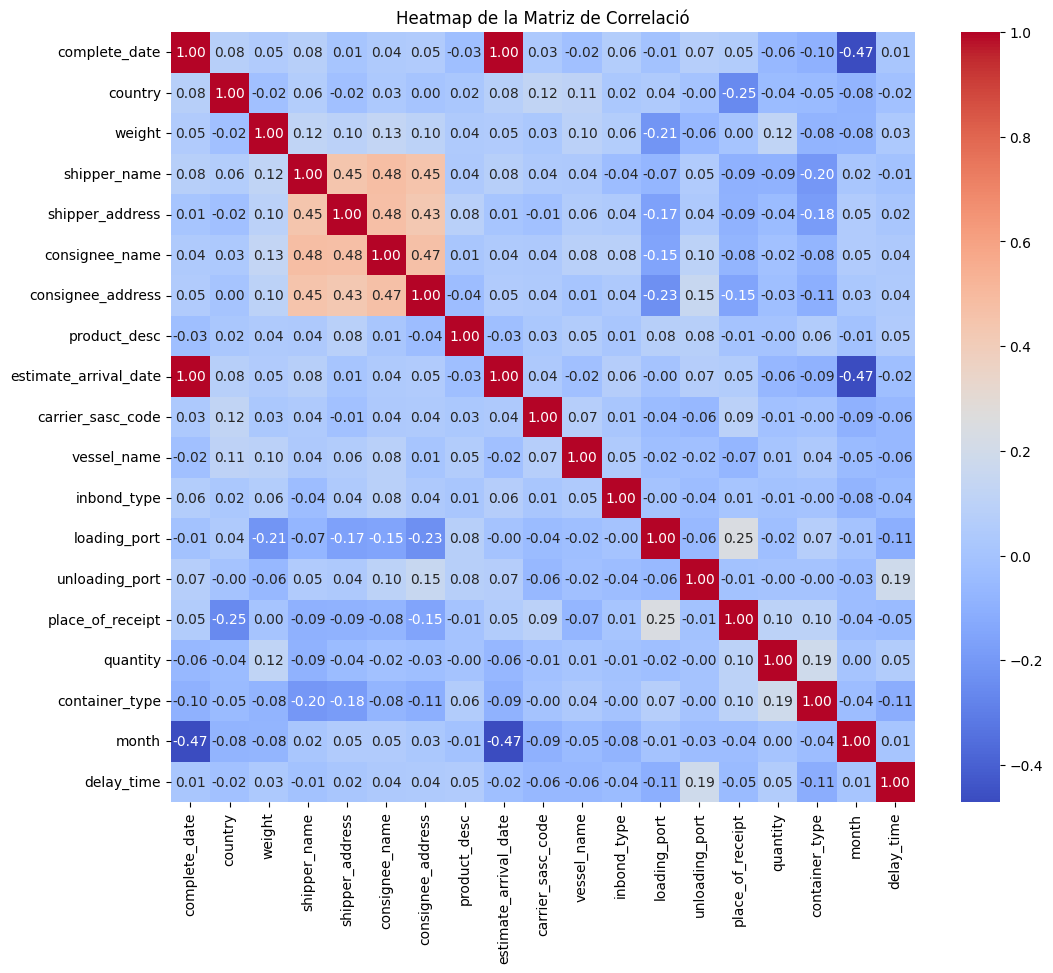

In [39]:

# Calcular la matriz de correlación
corr_matrix = df_subset.corr()

# Crear el heatmap con anotaciones
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de la Matriz de Correlació")
plt.show()


In [40]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Suprimir los warnings
warnings.filterwarnings("ignore")

# Convertir columnas de fecha en características numéricas

df_subset['estimate_arrival_date_year'] = df_subset['estimate_arrival_date'].dt.year
df_subset['estimate_arrival_date_month'] = df_subset['estimate_arrival_date'].dt.month
df_subset['estimate_arrival_date_day'] = df_subset['estimate_arrival_date'].dt.day
df_subset['delay_days'] = df_subset['delay_time'].dt.days


# Eliminar las columnas de fecha originales
df_subset.drop(['complete_date', 'estimate_arrival_date', 'delay_time'], axis=1, inplace=True)



In [41]:
# Separar las características de la variable objetivo
X = df_subset.drop(['delay_days'], axis=1)
y = df_subset['delay_days']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import xgboost as xgb
import lightgbm as lgb

# Suprimir los warnings
warnings.filterwarnings("ignore")

# Función para categorizar la predicción de retraso
def categorize_delay(delay):
    if delay <= 7:
        return '1 a 7 días'
    elif delay <= 15:
        return '7 a 15 días'
    else:
        return '15 a 30 días'

# Crear el pipeline para estandarizar los datos
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())  # Placeholder, el modelo real se establecerá en GridSearchCV
])

# Definir los modelos y parámetros para GridSearch
param_grid = [
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 10, 20]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 10, 20]
    },
    {
        'model': [SVR()],
        'model__kernel': ['linear', 'rbf'],
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto']
    },
    {
        'model': [xgb.XGBRegressor()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }
]

# Configurar el GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(r2_score), n_jobs=-1, verbose=2)

# Ejecutar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejor modelo:", best_model)
print("Mejores parámetros:", best_params)
print("Mejor R2 Score en validación cruzada:", best_score)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
test_r2_score = r2_score(y_test, y_pred)
print("R2 Score en el conjunto de prueba:", test_r2_score)

# Categorizar las predicciones y las etiquetas reales
y_pred_categorized = [categorize_delay(pred) for pred in y_pred]
y_test_categorized = [categorize_delay(actual) for actual in y_test]

# Calcular la precisión de la categorización
accuracy = accuracy_score(y_test_categorized, y_pred_categorized)
print("Precisión de la categorización:", accuracy)

# Guardar el mejor modelo
joblib.dump(best_model, 'best_model.pkl')

# Crear el DataFrame para la predicción
X_pred = pd.DataFrame({
    'country': [0.440758],
    'weight': [0.000191],
    'shipper_name': [0.295192],
    'shipper_address': [0.962090],
    'consignee_name': [0.843830],
    'consignee_address': [0.433450],
    'product_desc': [0.261740],
    'carrier_sasc_code': [0.317179],
    'vessel_name': [0.591569],
    'inbond_type': [0.000000],
    'loading_port': [0.530769],
    'unloading_port': [0.227941],
    'place_of_receipt': [0.157470],
    'quantity': [0.000002],
    'container_type': [0.046462],
    'month': [0.181818],
    'estimate_arrival_date_year': [2019],
    'estimate_arrival_date_month': [2],
    'estimate_arrival_date_day': [24]
})

# Preprocesar y hacer la predicción con el modelo entrenado
y_pred_delay = best_model.predict(X_pred)

# Categorizar la predicción
delay_category = categorize_delay(y_pred_delay[0])

print("Predicción de días de retraso:", y_pred_delay[0])
print("Categoría de días de retraso:", delay_category)


Fitting 5 folds for each of 87 candidates, totalling 435 fits
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=2; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=2; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=2; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=10; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=2; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=2; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=10; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=None, model__min_samples_split=10; total time=   0.0s
[CV] END model=DecisionTreeRegressor(), model__max_dept

In [ ]:
    {
        'model': [lgb.LGBMClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }